In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
import cv2
from PIL import Image 
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


**Loading the MNIST data from keras.datasets**

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 images
Test data = 10,000 images

Image diamentions = 28*28
Grayscale image -> 1 channel/ 1 color

In [6]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

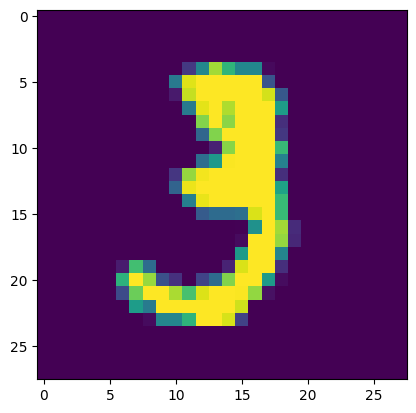

3


In [7]:
# Displaying the image 

plt.imshow(X_train[10])
plt.show()

print(y_train[10])

In [8]:
# Image Labels
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [9]:
# Unique values in y_train and y_test

print(np.unique(y_train))

print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
# Scaling the values

X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Building the Neural Network

In [12]:
# setting up the layers of the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Compiling the Neural Network

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [14]:
# Training the Neural Network

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8503 - loss: 0.5202
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9554 - loss: 0.1497
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9689 - loss: 0.1063
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9746 - loss: 0.0844
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9799 - loss: 0.0688
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9835 - loss: 0.0573
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9856 - loss: 0.0491
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9874 - loss: 0.0418
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9889 - loss: 0.0375
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9907 - loss: 0.0324


In [15]:
loss,accuracy = model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9624 - loss: 0.1410


In [16]:
print(accuracy)

0.9663000106811523


In [17]:
print(X_test.shape)

(10000, 28, 28)


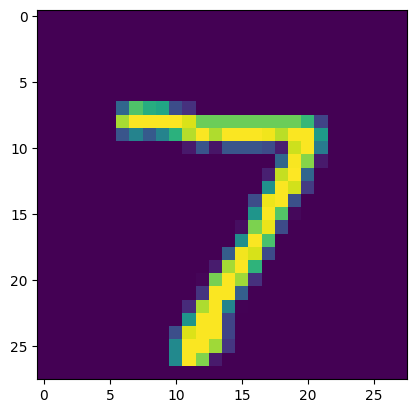

In [18]:
plt.imshow(X_test[0])
plt.show()

In [19]:
print(y_test[0])

7


In [20]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [21]:
print(y_pred.shape)

(10000, 10)


Probabilities of each class

model.predict() gives the prediction probability of each class for that data point

In [22]:
print(y_pred[0])

[2.19596853e-03 8.08997938e-05 5.89973181e-02 9.95793998e-01
 2.56964370e-08 1.42746221e-05 4.52380407e-12 9.99997079e-01
 1.15249574e-01 5.60649514e-01]


In [23]:
# Converting the prediction probabilities to class labels

label_for_first_image = np.argmax(y_pred[0])
print(label_for_first_image)

7


In [24]:
# Converting the prediction probabilities to class labels for all test data

y_pred_labels = [np.argmax(i) for i in y_pred]

print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 8, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [25]:
print(y_pred)

[[2.19596853e-03 8.08997938e-05 5.89973181e-02 ... 9.99997079e-01
  1.15249574e-01 5.60649514e-01]
 [2.89401203e-01 9.93402421e-01 1.00000000e+00 ... 3.45930266e-06
  9.40764614e-04 1.56162976e-08]
 [9.71832378e-06 9.99984920e-01 7.66224325e-01 ... 9.86046791e-01
  9.81850699e-02 8.81090527e-04]
 ...
 [3.87582986e-06 6.99537495e-08 9.80858317e-07 ... 8.23939681e-01
  1.01069044e-02 6.46321952e-01]
 [4.74626768e-06 4.73376451e-04 3.29205766e-04 ... 3.43111868e-04
  9.93390203e-01 1.04095248e-04]
 [5.46041131e-03 2.57468146e-05 2.26775259e-01 ... 3.29679438e-06
  1.59017404e-03 2.90984580e-11]]


y_test = True labels 

y_pred_labels = Predicted Labels

In [26]:
# Confusion Matrix

conf_mat = confusion_matrix(y_test,y_pred_labels)

In [27]:
print(conf_mat)

tf.Tensor(
[[ 964    0    3    2    0    2    0    2    1    6]
 [   1 1118    1    8    0    1    2    2    2    0]
 [   5    0  983   21    5    2    1    8    6    1]
 [   0    0    4  996    0    2    0    4    2    2]
 [   1    2    2    1  963    0    1    2    1    9]
 [   3    0    1   34    1  845    2    1    4    1]
 [  10    2    1    1    7   10  924    1    2    0]
 [   1    2    5    8    2    0    0  993    1   16]
 [   7    0   10   32    6    5    1    5  895   13]
 [   2    2    1    6   13    1    0    7    2  975]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

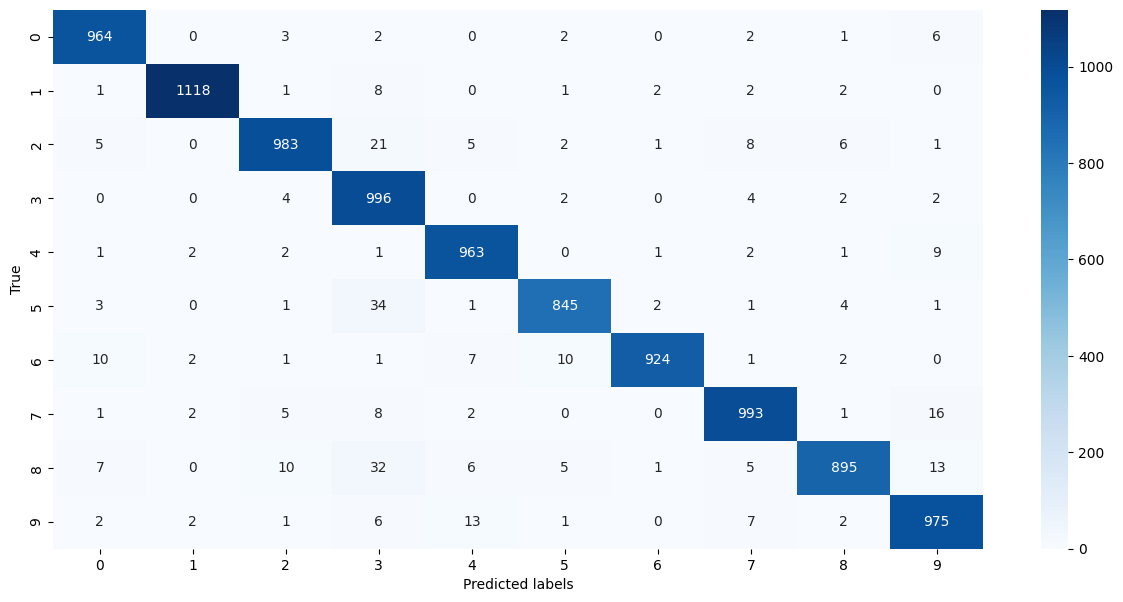

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat ,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True')
plt.xlabel('Predicted labels')